<a href="https://colab.research.google.com/github/tanishayadav16/DL_exp3/blob/main/exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Training Configuration: No Dropout, No Early Stopping
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - accuracy: 0.2783 - loss: 0.8219 - val_accuracy: 0.6703 - val_loss: 0.6129
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7397 - loss: 0.5799 - val_accuracy: 0.8791 - val_loss: 0.4754
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8854 - loss: 0.4541 - val_accuracy: 0.9451 - val_loss: 0.3809
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8952 - loss: 0.3568 - val_accuracy: 0.9670 - val_loss: 0.3056
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9558 - loss: 0.2795 - val_accuracy: 0.9780 - val_loss: 0.2466
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9663 - loss: 0.2141 - val_accuracy: 0.9780 - val_loss: 0.2038
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9634 - loss: 0.1791 - val_accuracy: 0.9670 - val_loss: 0.1753
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/s

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Training Configuration: Dropout + Early Stopping
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7157 - loss: 0.5832 - val_accuracy: 0.9011 - val_loss: 0.4280
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8408 - loss: 0.4486 - val_accuracy: 0.9451 - val_loss: 0.3335
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8731 - loss: 0.3675 - val_accuracy: 0.9560 - val_loss: 0.2732
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9118 - loss: 0.2992 - val_accuracy: 0.9560 - val_loss: 0.2288
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9365 - loss: 0.2331 - val_accuracy: 0.9670 - val_loss: 0.1973
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9549 - loss: 0.2159 - val_accuracy: 0.9670 - val_loss: 0.1750
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9359 - loss: 0.1989 - val_accuracy: 0.9670 - val_loss: 0.1582
Epoch 8/100
12/12 ━━

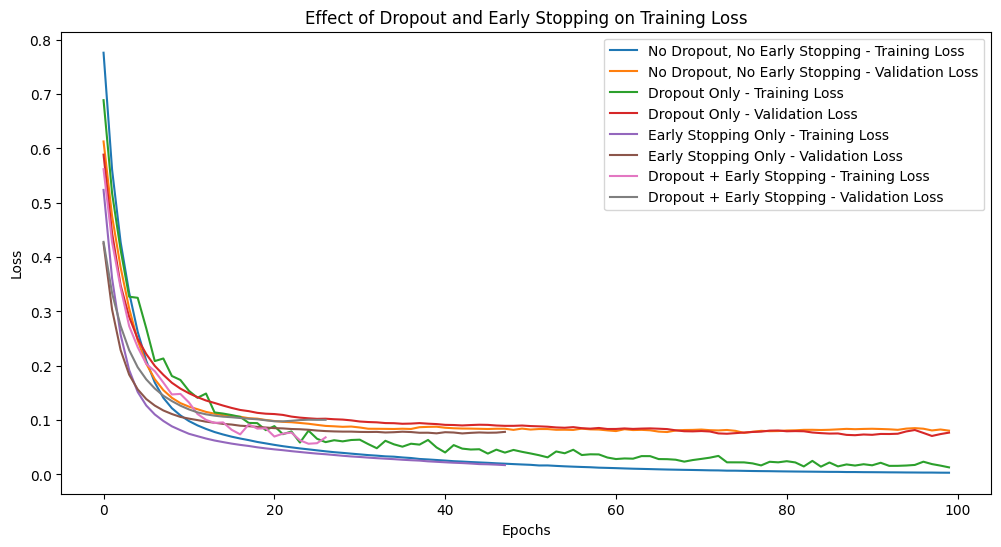


Configuration: No Dropout, No Early Stopping
Accuracy: 0.9737
              precision    recall  f1-score     support
malignant      0.976190  0.953488  0.964706   43.000000
benign         0.972222  0.985915  0.979021   71.000000
accuracy       0.973684  0.973684  0.973684    0.973684
macro avg      0.974206  0.969702  0.971863  114.000000
weighted avg   0.973719  0.973684  0.973621  114.000000

Configuration: Dropout Only
Accuracy: 0.9825
              precision    recall  f1-score     support
malignant      1.000000  0.953488  0.976190   43.000000
benign         0.972603  1.000000  0.986111   71.000000
accuracy       0.982456  0.982456  0.982456    0.982456
macro avg      0.986301  0.976744  0.981151  114.000000
weighted avg   0.982937  0.982456  0.982369  114.000000

Configuration: Early Stopping Only
Accuracy: 0.9825
              precision    recall  f1-score     support
malignant      1.000000  0.953488  0.976190   43.000000
benign         0.972603  1.000000  0.986111   71.00000

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Preprocess the Data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define a Function to Build the ANN Model
def build_model(dropout_rate=0.0):
    model = Sequential([
        Input(shape=(X.shape[1],)),  # Explicit Input layer
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(16, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 4: Experiment Configurations
configs = {
    "No Dropout, No Early Stopping": {"dropout_rate": 0.0, "early_stopping": False},
    "Dropout Only": {"dropout_rate": 0.2, "early_stopping": False},
    "Early Stopping Only": {"dropout_rate": 0.0, "early_stopping": True},
    "Dropout + Early Stopping": {"dropout_rate": 0.2, "early_stopping": True},
}

# Step 5: Run Experiments and Store Results
results = {}
for config_name, params in configs.items():
    print(f"\nTraining Configuration: {config_name}")

    # Build model
    model = build_model(dropout_rate=params["dropout_rate"])

    # Define callbacks
    callbacks = []
    if params["early_stopping"]:
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        callbacks.append(early_stopping)

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )

    # Evaluate model
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=data.target_names, output_dict=True)

    # Store results
    results[config_name] = {
        "Accuracy": accuracy,
        "Classification Report": pd.DataFrame(report).T,
        "History": history
    }

# Step 6: Plot Training Loss and Accuracy for Each Configuration
plt.figure(figsize=(12, 6))

for config_name, metrics in results.items():
    history = metrics["History"]

    # Plot Training and Validation Loss
    plt.plot(history.history['loss'], label=f'{config_name} - Training Loss')
    plt.plot(history.history['val_loss'], label=f'{config_name} - Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Effect of Dropout and Early Stopping on Training Loss')
plt.show()

# Step 7: Print Results Summary
for config_name, metrics in results.items():
    print(f"\nConfiguration: {config_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(metrics['Classification Report'])
